<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 12 - Data Engineering

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

#12.1 [4 Points] Coding Practice

Nội dung Assignment

*   Thực hành EDA trên dataset Pima Indians Diabetes

Các features trong dataset

Feature | Description
--------|------------
Pregnancies | Number of times pregnant
Glucose | Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure | Diastolic blood pressure (mm Hg)
SkinThickness | Triceps skin fold thickness (mm)
Insulin | 2-Hour serum insulin (mu U/ml)
BMI | Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction | Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age | Age (years)
**Outcome** | Label **0 if non-diabetic, 1 if diabetic**

In [ ]:
!wget http://nrvis.com/data/mldata/pima-indians-diabetes.csv

--2020-12-16 06:00:36--  http://nrvis.com/data/mldata/pima-indians-diabetes.csv
Resolving nrvis.com (nrvis.com)... 173.236.176.48
Connecting to nrvis.com (nrvis.com)|173.236.176.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/csv]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K   119KB/s    in 0.2s    

2020-12-16 06:00:37 (119 KB/s) - ‘pima-indians-diabetes.csv’ saved [23279/23279]



In [ ]:
import numpy as np
import warnings
import sys
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# style for chart
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')

In [ ]:
import pandas as pd

PATH = '/content/pima-indians-diabetes.csv'

df = pd.read_csv(PATH, names=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin'	,'BMI'	,'DiabetesPedigreeFunction'	,'Age'	,'Outcome'])

## 12.1.1 [0.5 Point] Data Exploration


**TODOs**
*   In ra 10 dòng ngẫu nhiên trong Dataframe
*   In ra thống kê sơ bộ của dữ liệu (các giá trị min-max-mean, ...)trong Dataframe
*   In ra kiểu dữ liệu (data type) của các feature, có feature nào định dạng là object hay không ?
*   In ra số lượng dòng bị null (tên khác na hoặc nan) của mỗi feature
*   Dữ liệu của chúng ta hầu hết là các **continuous value**, tuy nhiên vẫn có 2 cột là **categorical value** đó là Pregnancies và Outcome.
  * In ra  số lượng của mỗi unique value trong 2 cột Pregnancies và Outcome


In [ ]:
# In ra 10 dong ngau nhien
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
488,4,99,72,17,0,25.6,0.294,28,0
586,8,143,66,0,0,34.9,0.129,41,1
661,1,199,76,43,0,42.9,1.394,22,1
605,1,124,60,32,0,35.8,0.514,21,0
365,5,99,54,28,83,34.0,0.499,30,0
524,3,125,58,0,0,31.6,0.151,24,0
485,0,135,68,42,250,42.3,0.365,24,1
665,1,112,80,45,132,34.8,0.217,24,0
215,12,151,70,40,271,41.8,0.742,38,1
44,7,159,64,0,0,27.4,0.294,40,0


In [ ]:
# In ra thong ke so bo cua du lieu
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# in ra kieu du lieu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# kiem tra du lieu null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 12.1.2 [0.5 Point] Data Visualization

**TODOs**
*   Vẽ chart kết hợp và đếm cho 2 feature Pregnancies và Outcome
*   Vẽ Histogram cho toàn bộ các feature trong dataframe
*   Vẽ Heatmap cho Correlation Matrix

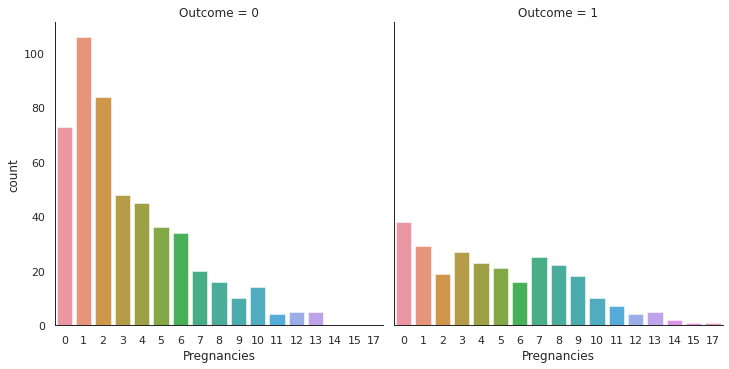

In [ ]:
# Chart ket hop va dem cho 2 feature Fregnancies va Outcome
sns.catplot(data = df,
            x = 'Pregnancies',
            col = 'Outcome',
            kind = 'count')

<Figure size 432x288 with 0 Axes>

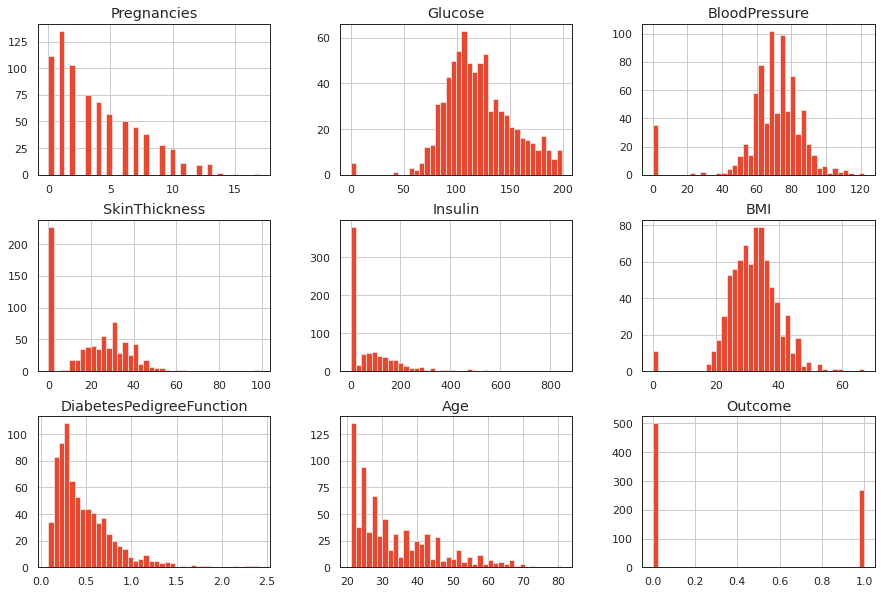

<Figure size 432x288 with 0 Axes>

In [ ]:
# Histogram cho toan bo feature
df.hist(figsize = (15,10),bins = 40)
plt.figure()

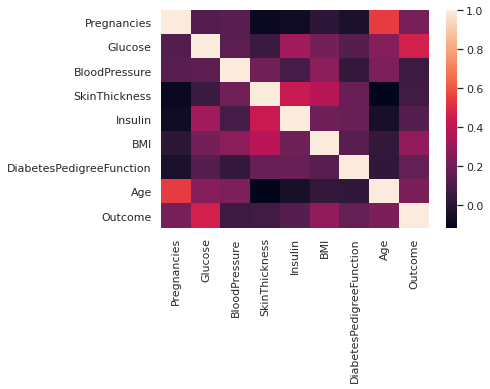

In [ ]:
#Heatmap cho corr matrix

sns.heatmap(df.corr())

## 12.1.3 [0.5 Point] Data Preprocessing

Nhìn vào Histogram được vẽ bên trên, ta thấy được có nhiều điểm bất hợp lý trong dữ liệu.


*   Các feature **`Insulin, SkinThickness, BloodPressure, BMI, Glucose`** có rất nhiều value bằng 0. Ở những feature này, value = 0 tương ứng với việc dữ liệu tại đó là null (nan / na)

Công việc của chúng ta là replace những value này về giá trị median / min / max / mode của chúng (hoặc xóa đi luôn)

Như ở bài lab trên lớp, ta thấy được việc replace giá trị nan có thể quyết định bằng cách **gộp feature hiện tại với 1 feature khác kiểu categorical** rồi tính median trên những điểm dữ liệu đã được gộp. 

Ví dụ **gộp hành khách theo Pclass** rồi mới replace giá trị null trong cột Age thành giá trị median của nhóm

```
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby("Pclass").Age.transform('median')

```

Trong bài này, ta sẽ thử  replace bằng median của toàn bộ cột.

Ví dụ: Dùng giá trị median của toàn bộ feature BMI để replace cho các giá trị = 0

In [ ]:
# Calculate the median value for BMI
median_bmi = df['BMI'].median()
# Replace it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=median_bmi)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**TODOs**

1.   Thực hiện tương tự để replace toàn bộ các value = 0 ở những feature còn lại **`Insulin, SkinThickness, BloodPressure, Glucose`**




In [ ]:
feature = ['Insulin','SkinThickness','BloodPressure','Glucose']
for i in feature :
    median = df[i].median()
    df[i] = df[i].replace(to_replace = 0, value = median)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


Ta vẽ Boxplot để xem sau khi replace những giá trị bằng 0 thì đồ thị trông như thế nào

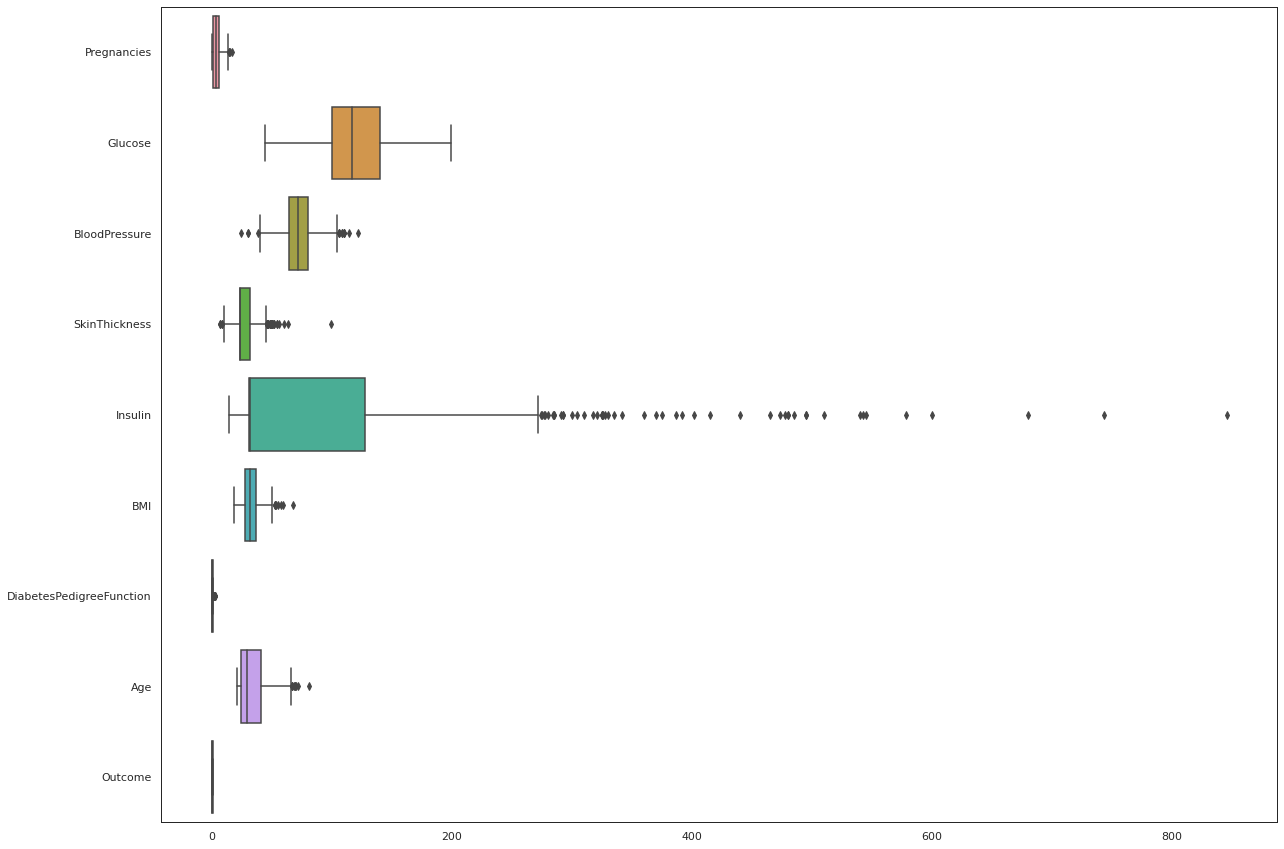

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df,orient = 'h',)

Đoạn code bên dưới mô tả việc tính q1, q3, min, max cho cột Insulin. Nhìn vào kết quả của giá trị min và max ta dễ dàng kết luận được:

1.   Cột Insulin không có low-outlier
2.   Những value lớn hơn 273 là outlier



In [ ]:
q1_insulin = np.quantile(df['Insulin'], 0.25, interpolation='midpoint')
q3_insulin = np.quantile(df['Insulin'], 0.75, interpolation='midpoint')
iqr_insulin = q3_insulin - q1_insulin
max_insulin = q3_insulin + 1.5 * iqr_insulin
min_insulin = q1_insulin - 1.5 * iqr_insulin
min_insulin, max_insulin

(-115.0, 273.0)

**TODOs**

*   Thực hiện tương tự với toàn bộ các feature còn lại (trừ Outcome) và kết luận các giá trị outlier của chúng

In [ ]:
feature_outlier = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in feature_outlier :
    q1 = np.quantile(df[i], 0.25, interpolation='midpoint')
    q3 = np.quantile(df[i], 0.75, interpolation='midpoint')
    iqr = q3 - q1
    max = q3 + 1.5 * iqr
    min = q1 - 1.5 * iqr
    print("Min {} :{:.3f}\nMax {}: {:.3f}\n".format(i,min,i,max))


Min Pregnancies :-6.500
Max Pregnancies: 13.500

Min Glucose :38.000
Max Glucose: 202.000

Min BloodPressure :40.000
Max BloodPressure: 104.000

Min SkinThickness :9.500
Max SkinThickness: 45.500

Min Insulin :-115.000
Max Insulin: 273.000

Min BMI :13.850
Max BMI: 50.250

Min DiabetesPedigreeFunction :-0.331
Max DiabetesPedigreeFunction: 1.201

Min Age :-1.500
Max Age: 66.500



## 12.1.4 [0.5 Point] Feature Scaling & Prepare Dataset

**TODOs**
* Split data into Train and Test Set
  * Test size = 0.3, randomstate = 42, stratify = y
* Apply StandardScaler

## 12.1.5 [2 Points] Train and Evaluate Model

**NOTE:** Đây là bài toán phân loại (Classification)

**TODOs**
* Dùng sklearn tạo và train các model sau: Support Vector Machine, Decision Tree
* Dùng keras tạo và train 1 Deep Neural Network
* Sau khi train xong, nhớ evaluate performance của model (hãy thử dùng metric f1_score của sklearn) trên 2 Set (Train / Test)
* Vẽ Heatmap - Confusion Matrix cho mỗi model
* Kết luận trong những model vừa làm, model nào là tôt nhất và tại sao

**Prepare Data**

In [ ]:
X = df.iloc[:,:-1].values
y = df['Outcome'].values
print(X.shape)
print(y.shape)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y, shuffle = True, test_size = 0.3, stratify = y, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(768, 8)
(768,)
(537, 8)
(537,)
(231, 8)
(231,)


In [ ]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([350, 187]))
(array([0, 1]), array([150,  81]))


In [ ]:
#StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

**Train model**

Support Vector Machine

In [ ]:
#Dùng sklearn tạo và train các model sau: Support Vector Machine, Decision Tree
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_scaled,y_train)
print(model_svm.score(X_train_scaled,y_train))
print(model_svm.score(X_test_scaled,y_test))
# Finetune SVC
# C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
# gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

# rbf_search = {'kernel': ['rbf'], 'gamma': gamma_values, 'C': C_values}

# linear_poly_search = {'kernel': ['linear','poly'], 'C': C_values}

# param_grid = [rbf_search, linear_poly_search]

# from sklearn.model_selection import GridSearchCV

# model_svm = SVC()
# grid = GridSearchCV(model_svm,param_grid,cv=5)
# grid.fit(X_train_scaled,y_train)
# print(grid.score(X_train_scaled,y_train))
# print(grid.score(X_test_scaled,y_test))

0.8472998137802608
0.7359307359307359


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_decisiontree= DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 42)
model_decisiontree.fit(X_train_scaled,y_train)
print(model_decisiontree.score(X_train_scaled,y_train))
print(model_decisiontree.score(X_test_scaled,y_test))

0.7951582867783985
0.7229437229437229


Deep Neral Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_mlp = Sequential()
model_mlp.add(Dense(100,input_shape= X_train_scaled.shape[1:], activation = 'relu'))
model_mlp.add(Dense(20,activation = 'relu'))
model_mlp.add(Dense(20,activation = 'relu'))
model_mlp.add(Dense(1,activation = 'sigmoid'))
model_mlp.compile(loss= 'binary_crossentropy',optimizer = 'adam', metrics = 'accuracy')

history = model_mlp.fit(X_train_scaled,y_train,epochs = 100, verbose = 1)

Epoch 1/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6220
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.7263
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7486
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7616
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.7803
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7877
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7952
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7970
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7933
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.7933
Epoch 11/

In [ ]:
print(model_mlp.evaluate(X_train_scaled,y_train))
print(model_mlp.evaluate(X_test_scaled,y_test))

17/17 [==============================] - 0s 946us/step - loss: 0.0349 - accuracy: 0.9963
[0.03494120016694069, 0.9962756037712097]
8/8 [==============================] - 0s 1ms/step - loss: 1.3349 - accuracy: 0.7229
[1.3348913192749023, 0.7229437232017517]


In [ ]:
# from sklearn.metrics import f1_score
models = [model_svm,model_decisiontree,model_mlp]
for model in models : 
    y_pred = model.predict(X_test_scaled)
    y_pred = np.where(y_pred>0.5,1,0)
    score = f1_score(y_test,y_pred)
    print('{:.3f}'.format(score))


0.567
0.549
0.579


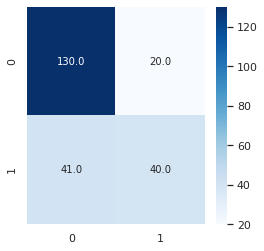

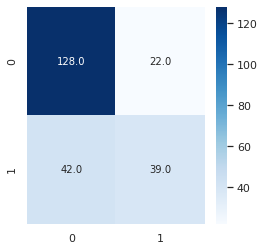

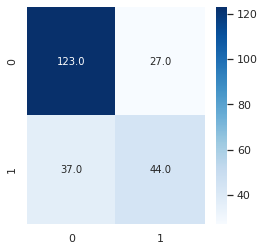

In [ ]:
from sklearn.metrics import confusion_matrix

models = [model_svm,model_decisiontree,model_mlp]

for model in models : 
    y_pred = model.predict(X_test_scaled)
    y_pred = np.where(y_pred>0.5,1,0)
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (4,4))
    sns.heatmap(cm,annot = True, cmap ='Blues',fmt = '.1f')